In [ ]:
import torch
from utils.dataloader import MNISTDataLoader
import matplotlib.pyplot as plt

batch_size = 10000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MNIST_dataset = MNISTDataLoader(batch_size, transform_mode="[0,1]")
MNIST_training_set = MNIST_dataset.get_dataloader(train=True, number=5)

In [31]:
for x in MNIST_training_set:
    images = x[0]
    break
images = images.reshape(-1, 28*28) # N * D
X_mean = torch.mean(images, 0, dtype=torch.float) # D

X_centered = images - X_mean

covariance = torch.matmul(X_centered.T, X_centered) / (X_centered.shape[0] - 1)

eigvals, eigvecs = torch.linalg.eigh(covariance)
# 更数值稳定，尤其当 D >> N 时（如 784 >> 1000）
# U, S, Vh = torch.linalg.svd(X_centered, full_matrices=False)
# 主成分方向就是 Vh.T 的列
# principal_components = Vh.T  # shape: [784, 784]

In [32]:
sorted_idx = torch.argsort(eigvals, descending=True)
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

In [33]:
k = 2
W = eigvecs[:, :k]  # 取前 k 个主成分
Z = images @ W # N * k
X_re = Z @ W.T

In [34]:
# data compression
def L2_loss(init, reconstruction):
    return torch.mean((init - reconstruction) ** 2)

L2_loss(images, X_re)

tensor(0.0892)

In [38]:
eigvals[:10]

tensor([5.3813, 3.8067, 3.2239, 2.8571, 2.5198, 2.3285, 1.7319, 1.5443, 1.4691,
        1.2173])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


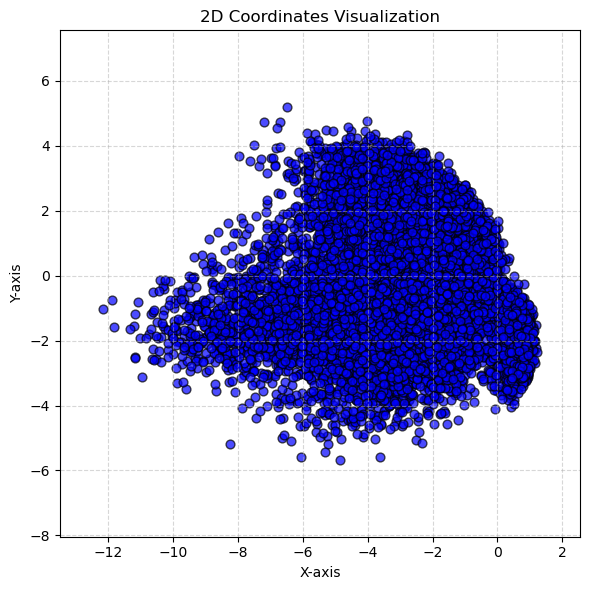

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 Z 是一个 numpy 数组，形状为 (N, 2)
# 示例：Z = np.random.randn(100, 2)


def plot_2d_points(Z, title="2D Coordinates Visualization"):
    Z = np.array(Z)
    x, y = Z[:, 0], Z[:, 1]

    plt.figure(figsize=(6, 6))  # 正方形画布
    plt.scatter(x, y, c="blue", alpha=0.7, edgecolors="k", s=40)
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis("equal")  # 保持 x/y 轴比例一致
    plt.grid(True, linestyle="--", alpha=0.5)

    # 根据数据自动设置边界范围 + margin
    x_margin = (x.max() - x.min()) * 0.1
    y_margin = (y.max() - y.min()) * 0.1
    plt.xlim(x.min() - x_margin, x.max() + x_margin)
    plt.ylim(y.min() - y_margin, y.max() + y_margin)

    plt.tight_layout()
    plt.show()


# 示例调用
plot_2d_points(Z)

## Visualization
1. eigenvectors
2. reconstruction

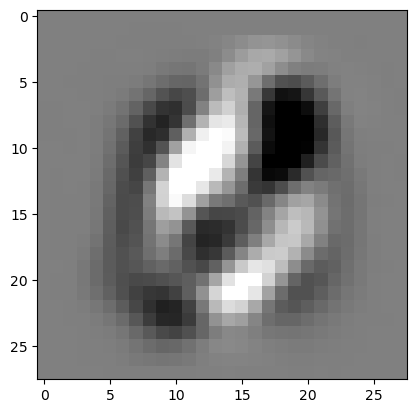

In [42]:
# 1. eigenvectors
plt.imshow(
    (eigvecs[:, 5]).reshape(28, 28).detach().numpy(), vmin=-0.1, vmax=0.1, cmap="gray"
)
# plt.colorbar()  # 显示颜色条
plt.show()

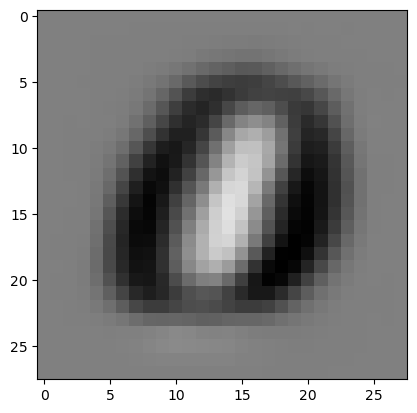

In [37]:
plt.imshow(
    (eigvecs[:, 0]).reshape(28, 28).detach().numpy(), vmin=-0.1, vmax=0.1, cmap="gray"
)
# plt.colorbar()  # 显示颜色条
plt.show()

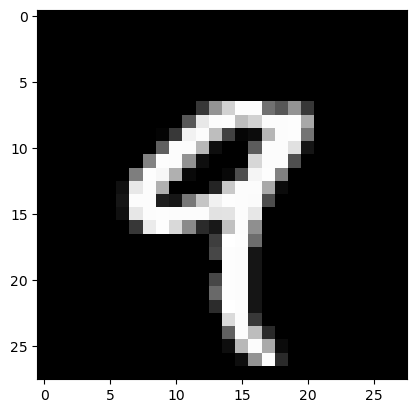

In [147]:
# 2. reconstruction
plt.imshow(images[0].reshape(28, 28).detach().numpy(), vmin=0, vmax=1, cmap="gray")

# plt.colorbar()  # 显示颜色条

plt.show()

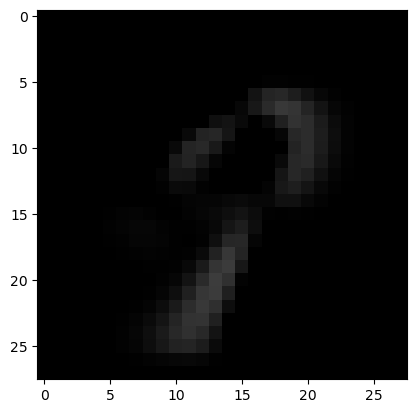

In [148]:
plt.imshow(X_re[0].reshape(28, 28).detach().numpy(), vmin=0, vmax=1, cmap="gray")
# plt.colorbar()  # 显示颜色条
plt.show()

In [149]:
Z.mean(0), Z.std(0)

(tensor([ 0.0675, -1.7727]), tensor([2.4906, 1.9479]))

In [162]:
Z_show = torch.tensor(
    [
        (Z.mean(0)[0] - 2 * Z.std(0)[0], Z.mean(0)[1] + 2 * Z.std(0)[1]),
        (Z.mean(0)[0] + 2 * Z.std(0)[0], Z.mean(0)[1] + 2 * Z.std(0)[1]),
        (Z.mean(0)[0] + 2 * Z.std(0)[0], Z.mean(0)[1] - 2 * Z.std(0)[1]),
        (Z.mean(0)[0] - 2 * Z.std(0)[0], Z.mean(0)[1] - 2 * Z.std(0)[1]),
    ]
)
X_show = Z_show @ W.T

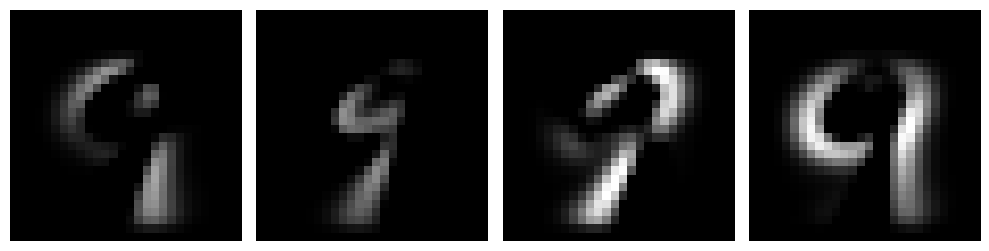

In [167]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(10, 3))  # 1 行 4 列

for i in range(4):
    axes[i].imshow(
        1*X_show[i].reshape(28, 28).detach().numpy(), vmin=0, vmax=1, cmap="gray"
    )
    axes[i].axis("off")  # 去掉坐标轴

plt.tight_layout()
plt.show()